# MNIST Digit Classification with TensorFlow and Keras

In this notebook, I have built a neural network to classify handwritten digits from the MNIST dataset.

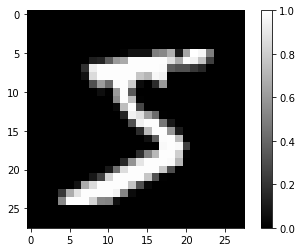

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first image in the training set
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Build the Neural Network Model
A simple neural network with two hidden layers.

In [2]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


## Train the Model

Train the model for 5 epochs.

In [3]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 19s 7ms/step - loss: 0.2146 - accuracy: 0.9342 - val_loss: 0.1096 - val_accuracy: 0.9662
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0907 - accuracy: 0.9718 - val_loss: 0.0954 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0859 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0799 - val_accuracy: 0.9772


## Evaluate the Model

Evaluate the model on the test dataset.

In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - loss: 0.0799 - accuracy: 0.9772 - 3s/epoch - 11ms/step

Test accuracy: 0.9771999716758728


## Plot Training and Validation Accuracy

Let's plot the training and validation accuracy to see how the model performs over epochs.

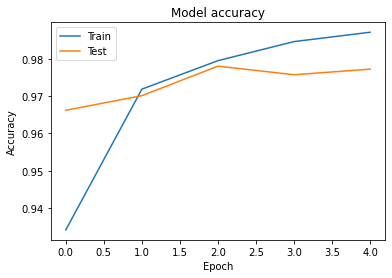

In [5]:
# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()